# Exercise 7 | Principle Component Analysis and K-Means Clustering

In [67]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
import math
from scipy.special import expit, logit
import scipy.misc, scipy.io, scipy.optimize, scipy.cluster.vq
import imageio
from matplotlib.pyplot import figure

# Part 1: Find Closest Centroids

In [68]:
#% Load an example dataset that we will be using
mat = scipy.io.loadmat('ex7data2.mat')

X = mat['X']
m, n = X.shape
print("Dimension de X = ({},{})".format(m,n))

Dimension de X = (300,2)


In [69]:
def findClosestCentroids(X, centroids):
    #% Set K
    K = centroids.shape[0]

    #% You need to return the following variables correctly.
    idx = np.zeros((X.shape[0], 1))
    #print(idx)
    
    for i in range(m):
        mid_d = np.inf
        for k in range(K):
            diff = (X[i] - centroids[k])
            #print(diff)
            d = np.dot(diff.T,diff)
            if d < mid_d:
                idx[i] = k
                mid_d = d
    
    return idx+1
    
    

In [70]:
print('Finding closest centroids.\n\n')
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

#% Find the closest centroids for the examples using the
#% initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(' :', idx[0:3])
print('\n(the closest centroids should be 1, 3, 2 respectively)\n')



Finding closest centroids.


Closest centroids for the first 3 examples: 

 : [[1.]
 [3.]
 [2.]]

(the closest centroids should be 1, 3, 2 respectively)



# Part 2: Compute Means 

In [71]:
def computeCentroids(X, idx, K):
    #% Useful variables
    m, n = X.shape

    #% You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    
    for k in range(K+1):
        num_k = 0
        suma = np.zeros((n,1))
        for i in range(m):
            if idx[i] == k:
                suma += (X[i,:].T).reshape((n,1))
                num_k += 1

        centroids[k-1,:] = (suma/num_k).T
    return centroids
    

In [72]:
print('\nComputing centroids means.\n\n')

#%  Compute means based on the closest centroids found in the previous part.
#% Select an initial set of centroids
K = 3; #% 3 Centroids
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(' :' , centroids)
print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')


Computing centroids means.


Centroids computed after initial finding of closest centroids: 

 : [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


# Part 3: K-Means Clustering

In [73]:
from sklearn.cluster import KMeans
print('\nRunning K-Means clustering on example dataset.\n\n')

#% Load an example dataset
mat = scipy.io.loadmat('ex7data2.mat')
X = mat["X"]

#% Settings for running K-Means
K = 3
max_iters = 10

#% For consistency, here we set centroids to specific values
#% but in practice you want to generate them automatically, such as by
#% settings them to be random examples (as can be seen in
#% kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6 ,2],[8, 5]])
#% Run K-Means algorithm. The 'true' at the end tells our function to plot
#% the progress of K-Means
#centroids, idx = runkMeans(X, initial_centroids, max_iters, true)

kmeans = KMeans(n_clusters=K, init = initial_centroids, max_iter=max_iters).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
print('\nK-Means Done.\n\n')


Running K-Means clustering on example dataset.


[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]

K-Means Done.




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10


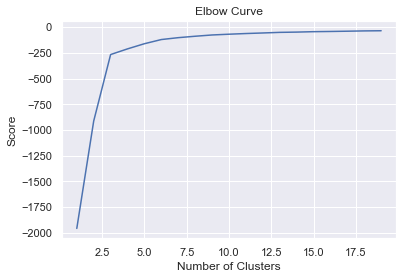

In [74]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [75]:
kmeans = KMeans(n_clusters=3, init = initial_centroids).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


# Part 4: K-Means Clustering on Pixels

In [76]:
def kMeansInitCentroids(X, K):
    # You should return this values correctly

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should set centroids to randomly chosen examples from
    #               the dataset X
    #

    randidx = np.random.permutation(X.shape[0])

    return X[randidx[0:K], :]


In [77]:
print('\nRunning K-Means clustering on pixels from an image.\n\n')

#%  Load an image of a bird
A = imageio.imread("bird_small.png")

#% If imread does not work for you, you can try instead
#%   load ('bird_small.mat');

A = A / 255.0 #% Divide by 255 so that all values are in the range 0 - 1

#% Size of the image
img_size = A.shape


#% Reshape the image into an Nx3 matrix where N = number of pixels.
#% Each row will contain the Red, Green and Blue pixel values
#% This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape((img_size[0] * img_size[1], 3))
#% Run your K-Means algorithm on this data
#% You should try different values of K and max_iters here
K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
#centroids, idx = runkMeans(X, initial_centroids, max_iters)

kmeans = KMeans(n_clusters = K, init = initial_centroids, max_iter = max_iters).fit(X)
centroids = kmeans.cluster_centers_
idx = kmeans.labels_
print(centroids)





Running K-Means clustering on pixels from an image.


[[0.21542676 0.20423875 0.19826578]
 [0.0791425  0.08587752 0.07509321]
 [0.10300368 0.1109192  0.10089814]
 [0.0602101  0.06586753 0.05606626]
 [0.59481854 0.55748194 0.57367131]
 [0.68328079 0.48381392 0.20428553]
 [0.95375969 0.84138383 0.61980429]
 [0.50369153 0.37366634 0.21498083]
 [0.97431357 0.93969591 0.80957897]
 [0.33420244 0.28170429 0.26071012]
 [0.45418095 0.41387497 0.43043172]
 [0.6956001  0.57080367 0.37427247]
 [0.84293993 0.70743187 0.46518985]
 [0.14297285 0.14974647 0.14118685]
 [0.73712889 0.72622108 0.77173245]
 [0.88711414 0.60411913 0.2896034 ]]


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10


# Part 5: Image Compression

In [78]:
from matplotlib import pyplot, cm, colors


Applying K-Means to compress an image.


(16384, 1)
(128, 128, 3)


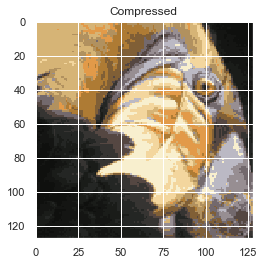

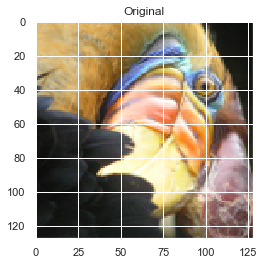

In [80]:
print('\nApplying K-Means to compress an image.\n\n')

# Find closest cluster members
idx = findClosestCentroids(X, centroids)
print(idx.shape)

# We can now recover the image from the indices (idx) by mapping each pixel
#(specified by its index in idx) to the centroid value
m = X.shape[0]
X_recovered = np.zeros(X.shape)

for i in range(m):
    k = int(idx[i]) - 1
    X_recovered[i] = centroids[k]

X_recovered = X_recovered.reshape( img_size[0], img_size[1], 3 )


print(X_recovered.shape)
axes = pyplot.gca()
figure = pyplot.gcf()
title = pyplot.title("Compressed")
axes.imshow(X_recovered)
pyplot.show(block=True)

axes2 = pyplot.gca()
figure2 = pyplot.gcf()
title2 = pyplot.title("Original")
axes2.imshow(A)
pyplot.show(block=True)

# PART 2

# Part 1: Load Example Dataset

In [81]:
from sklearn import preprocessing

Visualizing example dataset for PCA.




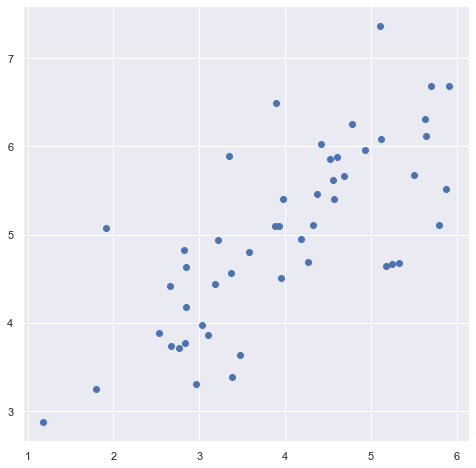

In [82]:
mat = scipy.io.loadmat('ex7data1.mat')
X = mat['X']

print('Visualizing example dataset for PCA.\n\n')

x = X[:,0]
y = X[:,1]
plt.figure(figsize=(8,8))
plt.plot(x, y, 'bo')
plt.show()

In [83]:
X = np.round(X, decimals=4)


# Part 2: Principal Component Analysis

In [84]:
scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

m = X_norm.shape[0]
t = 1/m
sigma = t*np.dot(X_norm.T,X_norm)

In [85]:
#%  Run PCA
u, s, vh = pca(X_norm)#np.linalg.svd(sigma, full_matrices=True)

In [86]:
print('Top eigenvector: \n')
print(' U(:,1) =  ', "[",u[0][0],", ", u[0][1],"]")
print('\n(you should expect to see -0.707107 -0.707107)\n')

Top eigenvector: 

 U(:,1) =   [ -0.7071067811865477 ,  -0.7071067811865476 ]

(you should expect to see -0.707107 -0.707107)



# Part 3: Dimension Reduction


Dimension reduction on example dataset.




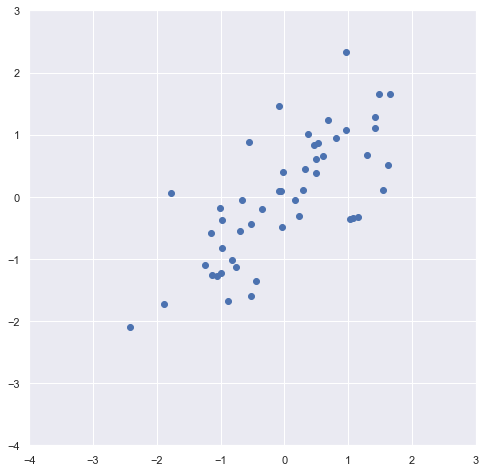

In [87]:
print('\nDimension reduction on example dataset.\n\n')
plt.figure(figsize=(8,8))
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.xlim(-4,3)
plt.ylim(-4,3)
plt.show() 

In [100]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    
    U_reduce = U[:,0:K]
    
    m = X.shape[0]
    
    for i in range(m):
        Z[i,:] = np.dot(U_reduce.T, X[i,:]).T
        
    return Z
    
    
def recoverData(Z, U, K):
    
    m = Z.shape[0]
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    U_reduce = U[:, 0:K]
    
    for i in range(m):
        X_rec[i,:] = (np.dot(U_reduce,Z[i,:].T)).T


    return X_rec

def drawdline(x1, x2):
    #x1, x2 = [-1, 12], [1, 4]
    
    return plt.plot([x1[0], x2[0]], [x1[1], x2[1]], marker = '*')

Projection of the first example: 
 [1.49629135]

(this value should be about 1.481274)

****Error generado:  2.1261740208444735e-05
**************************************************


Approximation of the first example: 
 [-1.05803776 -1.05803776]

(this value should be about  -1.047419 -1.047419)


****Error generado:  [-0.01061876 -0.01061876]


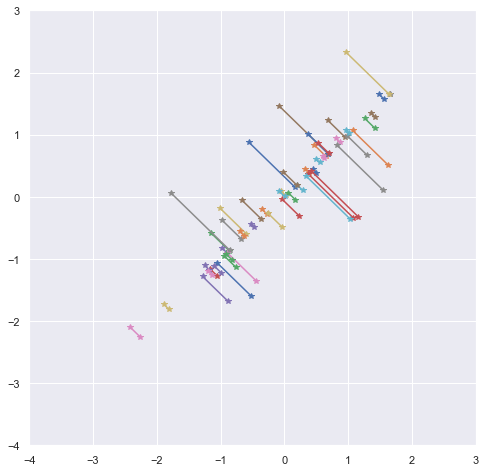

Program paused. Press enter to continue.



In [89]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, u, K)
print('Projection of the first example: \n', Z[0])
print('\n(this value should be about 1.481274)\n')

e = abs(Z[0] - 1.49631261)
print("****Error generado: ", e[0])
print("**"*25)

X_rec  = recoverData(Z, u, K)
print('\n\nApproximation of the first example: \n', X_rec[0])
print('\n(this value should be about  -1.047419 -1.047419)\n\n')
error = X_rec - [-1.047419, -1.047419]
print("****Error generado: ",error[0])
#  Draw lines connecting the projected points to the original points
m = X_norm.shape[0]
plt.figure(figsize=(8,8))
for i in range(m):
    drawdline(X_norm[i,:], X_rec[i,:])
    
plt.xlim(-4,3)
plt.ylim(-4,3)
plt.show()
print('Program paused. Press enter to continue.\n')

# Part 4: Loading and Visualizing Face Data

In [90]:
from math import floor, sqrt, ceil


def DisplayData(X, example_width = None):
    
    plt.figure(figsize=(8,8))
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(sqrt(X.shape[1])))

    # Gray Image
    plt.set_cmap("gray")
    
    m, n = X.shape
    
    example_height = int(n / example_width)
    #print("example_height ",example_height)
    # Compute number of items to display
    display_rows = int(ceil(sqrt(m)))
    #print("display_rows ",display_rows)
    display_cols = int(ceil(m / display_rows))
    #print("display_cols ",display_cols)
    # Between images padding
    pad = 1

    # Setup blank display
    s = pad + display_rows * (example_height + pad)
    t = pad + display_cols * (example_width + pad)
    display_array = -np.ones((s,t))
    curr_ex = 0
    
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break
            # Copy the patch
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex, :]))
            
            
            a = pad + j * (example_height + pad) + np.array(range(example_height+1))
            b = pad + i * (example_width + pad) + np.array(range(example_width+1))
            #display_array[a,b] = X[curr_ex, :].reshape(example_height, example_width) / max_val
            
            display_array[a[0]:a[-1], b[0]:b[-1]] = np.reshape(X[curr_ex, :],
                                                               (example_height, example_width),
                                                               order="F") / max_val
            
            
            curr_ex += 1
            
    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)

    # Do not show axis
    plt.axis('off')
    #plt.show(block=False)
    # display_array
    return h, display_array 
            
    


Loading face dataset.




(<matplotlib.image.AxesImage at 0x1edc5a29748>,
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -0.30570308, -0.20882444, ...,  0.02776458,
         -0.02539565, -1.        ],
        [-1.        , -0.37028884, -0.2734102 , ...,  0.00118446,
         -0.05197577, -1.        ],
        ...,
        [-1.        ,  0.05386743, -0.41159068, ..., -0.69830925,
         -0.83105318, -1.        ],
        [-1.        ,  0.44028549, -0.18325274, ..., -0.66210637,
         -0.84312081, -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ]]))

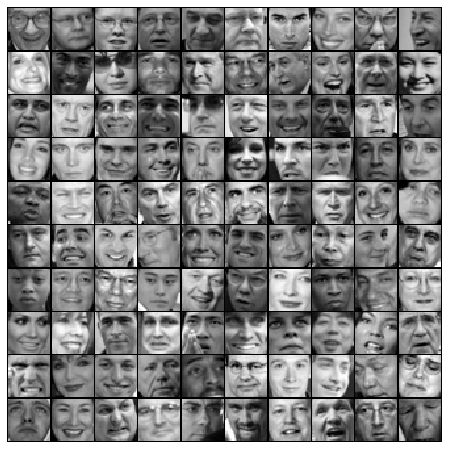

In [91]:
print('\nLoading face dataset.\n\n')

#%  Load Face dataset
mat = scipy.io.loadmat('ex7faces.mat')
X = mat['X']

#  Display the first 100 faces in the dataset
DisplayData(X[:100, :])



# Part 5: PCA on Face Data: Eigenfaces

In [92]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.decomposition import PCA


In [93]:
def pca(X):
    
    m, n = X.shape
    t = 1/m
    sigma = t*np.dot(X.T, X)
    
    u, s, vh = np.linalg.svd(sigma, full_matrices=True)
    
    return u, s, vh

def featureNormalize(X):
    
    scaler = StandardScaler()
    scaler = scaler.fit(X)
    
    mu = scaler.mean_               
    sigma = np.sqrt(scaler.var_)
    X_norm = scaler.transform(X)
    ######################
    
    return X_norm, mu, sigma
    


Running PCA on face dataset.
(this might take a minute or two ...)


Program paused. Press enter to continue.



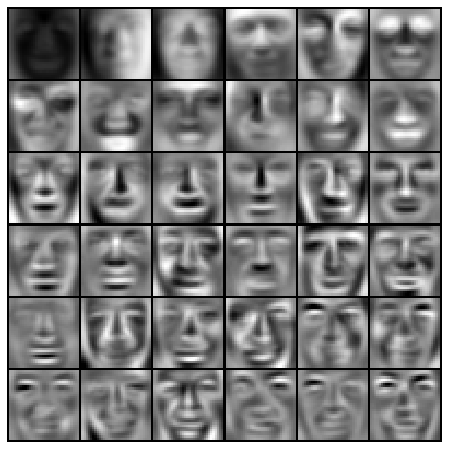

In [94]:
print('\nRunning PCA on face dataset.\n'\
         '(this might take a minute or two ...)\n\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S, vh = pca(X_norm)

#  Visualize the top 36 eigenvectors found
DisplayData(U[:, 0:36].T)

print('Program paused. Press enter to continue.\n')

# Part 6: Dimension Reduction for Faces

In [102]:
print('\nDimension reduction for face dataset.\n\n')

K = 100
Z = projectData(X_norm, U, K)
print('The projected data Z has a size of:{} '.format(Z.shape))
print('\n\nProgram paused. Press enter to continue.\n')




Dimension reduction for face dataset.




Program paused. Press enter to continue.



# Part 7: Visualization of Faces after PCA Dimension Reduction


Visualizing the projected (reduced dimension) faces.


Program paused. Press enter to continue.



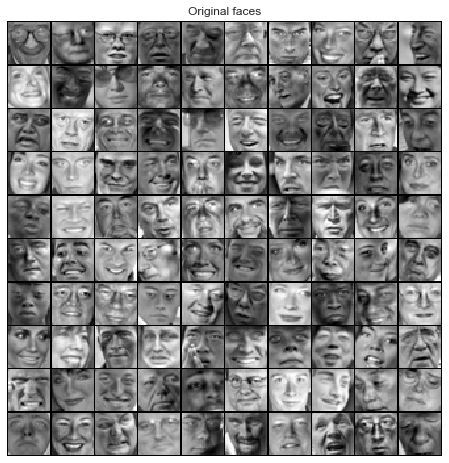

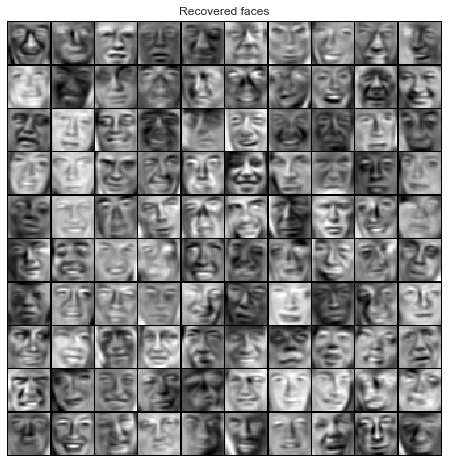

In [103]:
print('\nVisualizing the projected (reduced dimension) faces.\n\n')

K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
DisplayData(X_norm[:100,:])
plt.title('Original faces')

# Display reconstructed data from only k eigenfaces
DisplayData(X_rec[:100,:])
plt.title('Recovered faces')
print('Program paused. Press enter to continue.\n')


# Part 8(a): Optional (ungraded) Exercise: PCA for Visualization

# Part 8(b): Optional (ungraded) Exercise: PCA for Visualization

In [ ]:
[j for j in range(1, 10 + 1)]